<a href="https://colab.research.google.com/github/theinem/Hello-World-en-Machine-Learning-con-Redes-Neuronales-Artificiales/blob/master/MachineLearning_Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hello World en Machine Learning con Redes Neuronales Artificiales**

Este notebook es con el fin de familiarizar a personas con el proceso básico del machine learning.
Está basado en el documento de Google "Hello-ML-World.ipynb"

Para más información, pueden consultar el video:

**Machine Learning Foundations: Ep #1 - What is ML:** youtu.be/_Z9TRANg4c0


---



---


Primero, exportaremos librerías que serán útiles más adelante.

In [1]:
import tensorflow as tf                 #entrenamiento de la red
from tensorflow import keras            #entrenamiento de la red
import numpy as np                      #librería de cálculo
import matplotlib.pyplot as plt         #realizar gráficas
import seaborn as sns                   #para darle mayor estilo a las gráficas
sns.set()                               #configuración tipo set

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Miremos un escenario en donde un tercero ha escrito una función de la forma
- y = 2*x - 1

In [0]:
def funcion_tercero(x):
    y = 2*x - 1
    return y

Nosotros no conocemos esa función, solo tendremos acceso a algunos datos que fueron generados por dicha función. 

La **lista x** y **lista y** serán los datos con los que contemos.

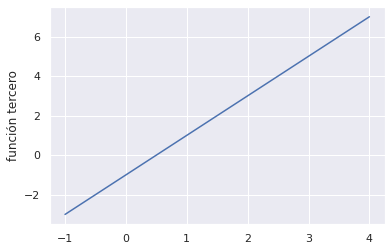

Resultados de la función del tercero:
 x =  [-1.  0.  1.  2.  3.  4.] 
 y =  [-3. -1.  1.  3.  5.  7.]


In [3]:
x = [-1, 0, 1, 2, 3, 4]
y = [funcion_tercero(i) for i in x]
x = np.array(x, dtype = float)
y = np.array(y, dtype = float)


plt.plot(x, y)
plt.ylabel('función tercero')
plt.show()
print('Resultados de la función del tercero:\n x = ', x, '\n y = ', y)

# **Definir y compilar la red neuronal**
Será una configuración muy simple con una sola neurona (units = 1) y una sola entrada (input_shape = [1])

In [0]:
model = tf.keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])

Si quieres revisar la configuración de tu modelo, puedes emplear summary. 

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# **Momento de compilar el modelo.**
- **optimizer**: agiliza la búsqueda de los parámetros óptimos. Se usa en este ejemplo a *'sgd'*. Como podemos ver en el summary anterior, hay dos parámetros entrenables. Uno es el peso sináptico o simplemente *peso* (W). El otro es el *bias* (b). Nuestra neurona tiene la ecuación: **salida = W × entrada + b**

- **loss**: también llamado costo o pérdida. Empleamos *'mean_square_error'*. Nos permite medir el desempeño. Si una predicción de la red es muy mala, el costo es alto, el objetivo de la red será minimizarlo.

In [0]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

# **Entrenamiento de la red**
Se emplea model.fit. Es un proceso iterativo de perfeccionamiento. La red propone una solución, y luego mide su error, este error es empleado por el optimizador para decidir cómo modificar los pesos y el bias.

In [7]:
model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 19.3740
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 15.5057
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 12.4569
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 10.0529
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 8.1565
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 6.6593
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 5.4764
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 4.5410
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 3.8002
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 3.2127
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 2.7459
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 2.3742
Epoch 13/500
1/1 [==============================] - 0s 2m

# **Poniendo a prueba la red**
Se compararán nuestros datos **y** generados con la red con respecto a los originales de la función del tercero. Luego probaremos con x = 10. Dato que jamás se le había mostrado a la red.

In [8]:
prediccion = model.predict(x)

for i in range(len(prediccion)):
  print('la red indica:', prediccion[i][0],'\t -- función tercero:', y[i])

print('\n Dato jamás visto x = 10. la red indica:', model.predict([10])[0][0], '-- función tercero:', funcion_tercero(10))

la red indica: -2.9885764 	 -- función tercero: -3.0
la red indica: -0.9913624 	 -- función tercero: -1.0
la red indica: 1.0058515 	 -- función tercero: 1.0
la red indica: 3.0030656 	 -- función tercero: 3.0
la red indica: 5.0002794 	 -- función tercero: 5.0
la red indica: 6.9974933 	 -- función tercero: 7.0

 Dato jamás visto x = 10. la red indica: 18.980778 -- función tercero: 19


# **Parámetros del modelo**
Comprobamos los parámetros aprendidos por la red. 
- W muy cercano a 2
- b muy cercano a -1

In [9]:
model.get_weights()

[array([[1.997214]], dtype=float32), array([-0.9913624], dtype=float32)]

## **Comparamos los datos y el modelo gráficamente**

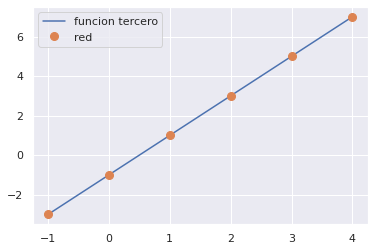

In [10]:
plt.plot(x, y)
plt.plot(x, prediccion, '.', markersize=16)
plt.legend(['funcion tercero', 'red'], loc='upper left')
#plt.ylabel('función tercero')
plt.show()